In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from google.colab import files
uploaded=files.upload()

Saving train.csv to train (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

# **EDA**

In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns = df.columns.str.strip()

# DEALING WITH **MISSING** **VALUES**

<Axes: xlabel='Cabin', ylabel='Survived'>

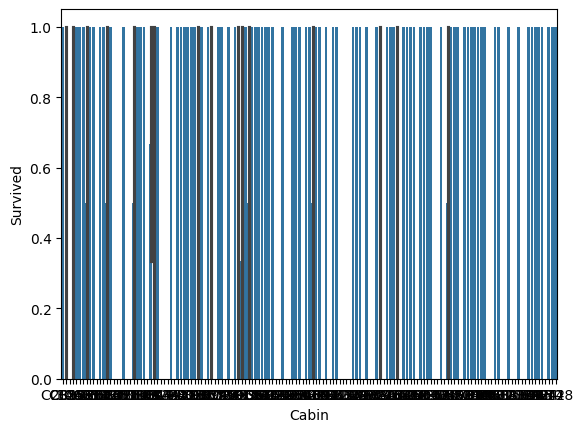

In [ ]:
sns.barplot(x='Cabin', y='Survived', data=df)

In [ ]:
#on hold ..will see if te feature can improve the model or will only add noise
df=df.drop(columns='Cabin',axis=1)

In [ ]:
df.shape
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Age']

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [ ]:
df.fillna({'Age':df['Age'].mean()},inplace=True)

In [ ]:
df['Age']

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(df['Embarked'].mode()[0])

S


In [ ]:
df.fillna({'Embarked': df['Embarked'].mode()[0]},inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **PLOTTING**

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


/tmp/ipython-input-898839912.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df,palette='Set1') #we have to use keyword for newer version


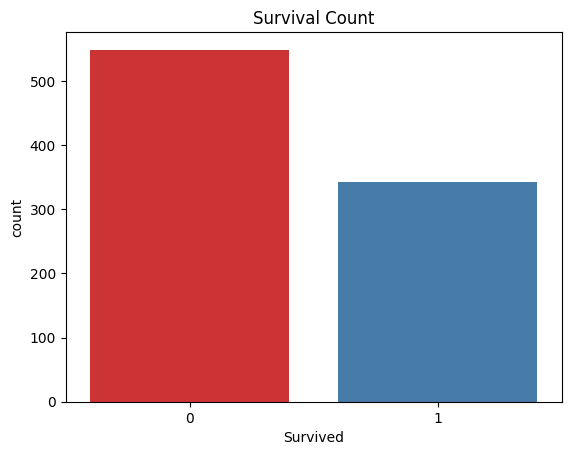

In [ ]:
sns.countplot(x='Survived',data=df,palette='Set1') #we have to use keyword for newer version
plt.title('Survival Count')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

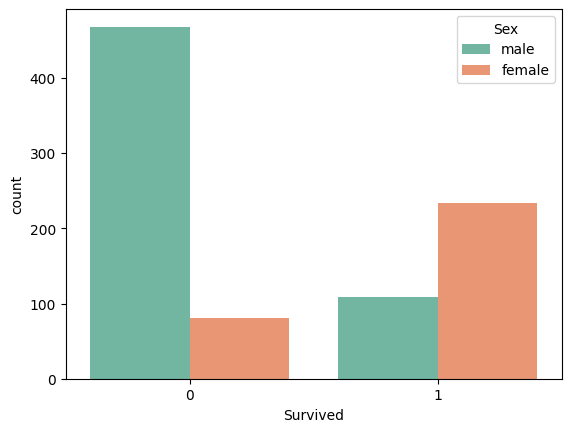

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='Set2')

<Axes: xlabel='Age', ylabel='count'>

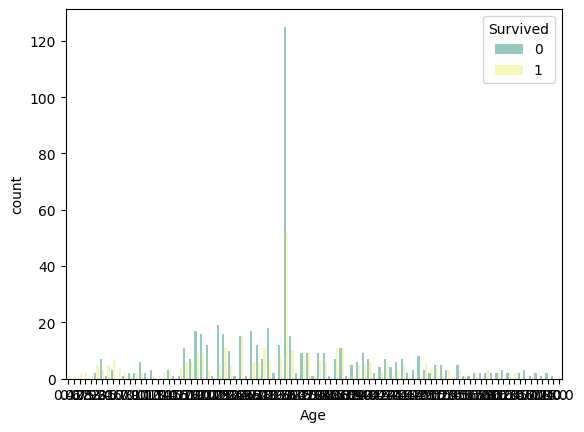

In [ ]:
sns.countplot(x='Age',hue='Survived',data=df,palette='Set3')

In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **ENCODING**

In [ ]:
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df.infer_objects(copy='false')


/tmp/ipython-input-2841111132.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


# **FEATURE** **ENGINEERING**

In [ ]:
#Feature engineering but it is not helping the cross validation
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger themselves
df['TicketGroupSize'] = df.groupby('Ticket')['Ticket'].transform('count')
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

In [ ]:
x=df.drop(columns=['Name','PassengerId','Ticket','Survived'],axis=1)
y=df['Survived']


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,TicketGroupSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1


# **MODEL** **TRAINING**

In [ ]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  FamilySize  \
0         3    0  22.000000      1      0   7.2500         0           2   
1         1    1  38.000000      1      0  71.2833         1           2   
2         3    1  26.000000      0      0   7.9250         0           1   
3         1    1  35.000000      1      0  53.1000         0           2   
4         3    0  35.000000      0      0   8.0500         0           1   
..      ...  ...        ...    ...    ...      ...       ...         ...   
886       2    0  27.000000      0      0  13.0000         0           1   
887       1    1  19.000000      0      0  30.0000         0           1   
888       3    1  29.699118      1      2  23.4500         0           4   
889       1    0  26.000000      0      0  30.0000         1           1   
890       3    0  32.000000      0      0   7.7500         2           1   

     TicketGroupSize  IsAlone  
0                  1        0  
1                  1   

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
print("Accuracy: ",lr_model.score(x_test,y_test))

Accuracy:  0.44560580735059674


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
print("Accuracy: ", dt_model.score(x_test,y_test))


Accuracy:  0.7835820895522388


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
print('Accuracy: ',rf_model.score(x_test,y_test))

Accuracy:  0.7910447761194029


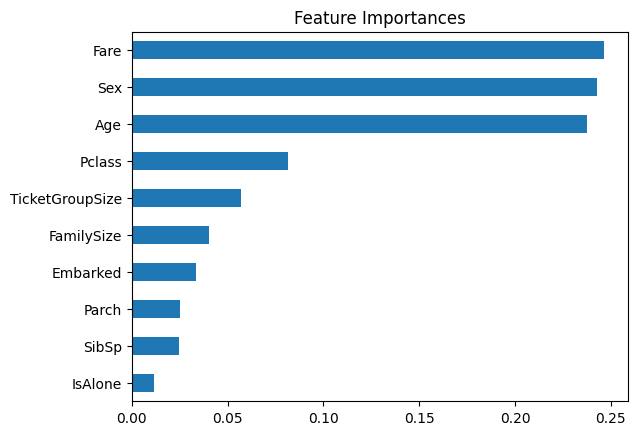

In [ ]:
importances = rf_model.feature_importances_
features = x_train.columns

# Plot
pd.Series(importances, index=features).sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(x_test,y_test)


KNeighborsClassifier()

In [ ]:
print("Accuracy: ",KNN_model.score(x_test,y_test))

Accuracy:  0.8022388059701493


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Convert to DMatrix (optional but recommended for performance)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

# Predict and evaluate
xgb_preds = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))

XGBoost Accuracy: 0.8097014925373134


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:30:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)

# Predict and evaluate
gb_preds = gb_model.predict(x_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))

Gradient Boosting Accuracy: 0.8582089552238806


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5,shuffle=True,random_state=42)
scores=cross_val_score(estimator=gb_model,X=x,y=y,cv=kf,scoring='accuracy')

In [ ]:
print("Cross-Validation Scores: ",scores)
print("CrossValidationMean: ",scores.mean())
print("Standard Deviation: ",scores.std())

Cross-Validation Scores:  [0.80446927 0.80337079 0.86516854 0.80337079 0.82022472]
CrossValidationMean:  0.8193208210407382
Standard Deviation:  0.02380002505635879


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

logreg_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000, random_state=42)
)
logreg_model.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
print('Accuracy: ',logreg_model.score(x_test,y_test))

Accuracy:  0.8171641791044776


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,TicketGroupSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1


In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf',RandomForestClassifier(n_estimators=100,random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Meta learner
meta_model = LogisticRegression(max_iter=1000)

# Build stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    passthrough=False,          # If True, pass original features to meta-model as well
    cv=5                        # cross-validation for blending predictions
)

# Train
stacking_model.fit(x_train, y_train)

# Evaluate
y_pred = stacking_model.predict(x_test)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, y_pred))

Stacking Ensemble Accuracy: 0.8432835820895522


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline: scaling + model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Define hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(x, y)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logreg__C': [0.01, 0.1, 1, 10, 100],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'saga'}
Best Score: 0.7991212102190698


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,TicketGroupSize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(pipe, param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(x, y)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'logreg__solver': 'saga', 'logreg__penalty': 'l2', 'logreg__C': np.float64(0.23357214690901212)}
Best Score: 0.797991337643588


In [ ]:
from sklearn.metrics import f1_score, classification_report

# Predictions
y_pred = gb_model.predict(x_test)

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred))

# Detailed report (precision, recall, f1 per class)
print(classification_report(y_test, y_pred))


F1 Score: 0.8020833333333334
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       170
           1       0.82      0.79      0.80        98

    accuracy                           0.86       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.86      0.86      0.86       268



ROC-AUC: 0.8908463385354142


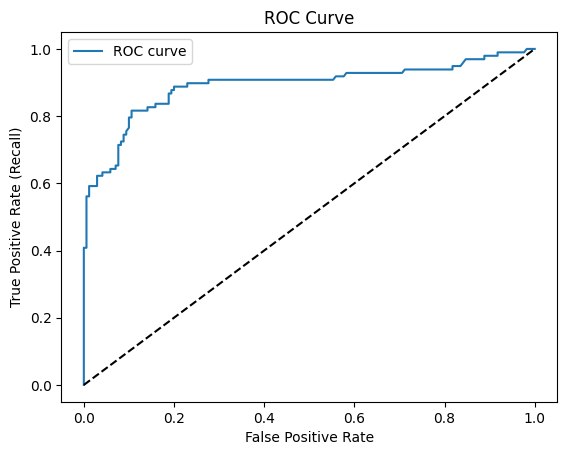

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predicted probabilities for class 1
y_probs = gb_model.predict_proba(x_test)[:,1]

# ROC-AUC score
print("ROC-AUC:", roc_auc_score(y_test, y_probs))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0,1], [0,1], 'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()


# **SAVING WITH JOBLIB**

In [ ]:
!pip install joblib


In [ ]:
import joblib

# Example: trained model
# model.fit(X_train, y_train)

# Save model
joblib.dump(logreg_model, "logistic_model.pkl")


['logistic_model.pkl']

In [ ]:
models = {
    "logreg": logreg_model,
    "rf": rf_model,
    "stacking": stacking_model,
    "dt": dt_model,
    "KNN": KNN_model,
    "XGB": xgb_model,
    "GB": gb_model,
    "kf": kf,
    "lr": lr_model
}

joblib.dump(models, "all_models.pkl")

# Load
loaded_models = joblib.load("all_models.pkl")
print(loaded_models.keys())


dict_keys(['logreg', 'rf', 'stacking', 'dt', 'KNN', 'XGB', 'GB', 'kf', 'lr'])


In [ ]:
loaded_models = joblib.load("all_models.pkl")

# **USING SHAP**

In [ ]:
!pip install shap
import shap

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=12305034cd8abde706bbc5485151d7b0e8f576737f6499d85fc7bb1fb6a63069
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

In [129]:
models1 = {

    "rf": rf_model,

    "dt": dt_model,
    "KNN": KNN_model,
    "XGB": xgb_model,
    "GB": gb_model,

}

models2= {
    "logreg": logreg_model,
    "KNN": KNN_model,
     "lr": lr_model
  }
results={}

Running SHAP for rf ...


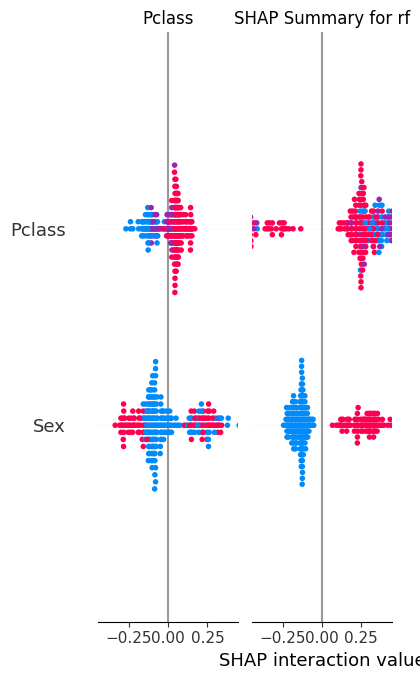

Running SHAP for dt ...


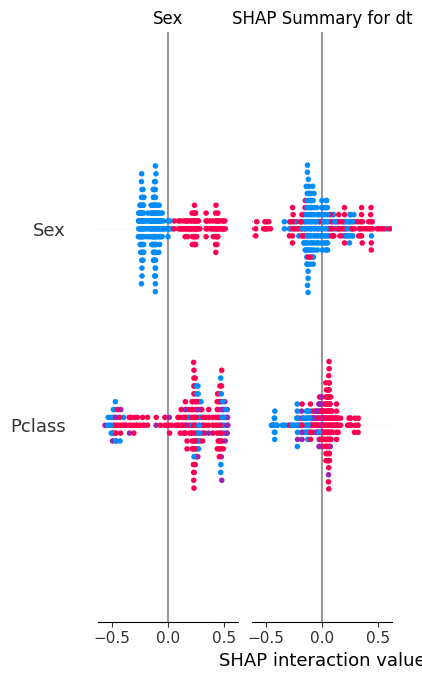

Running SHAP for KNN ...
SHAP failed for KNN: Model type not yet supported by TreeExplainer: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Running SHAP for XGB ...


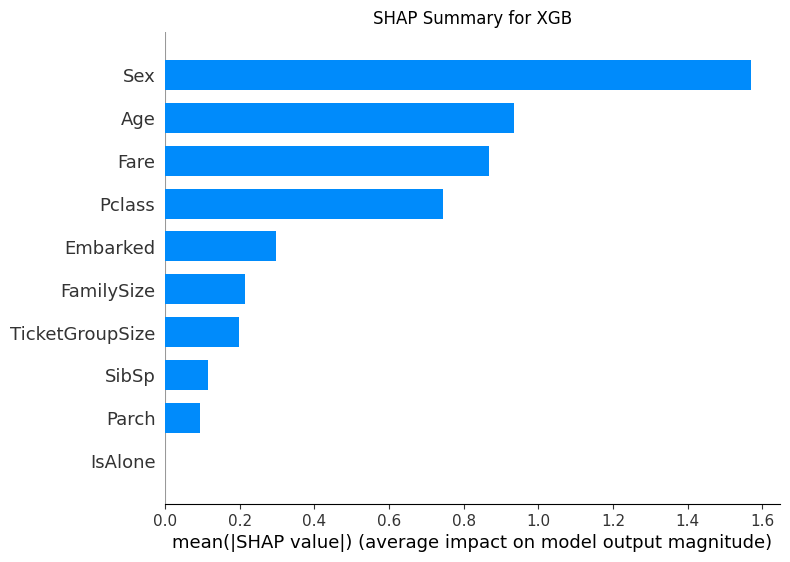

Running SHAP for GB ...


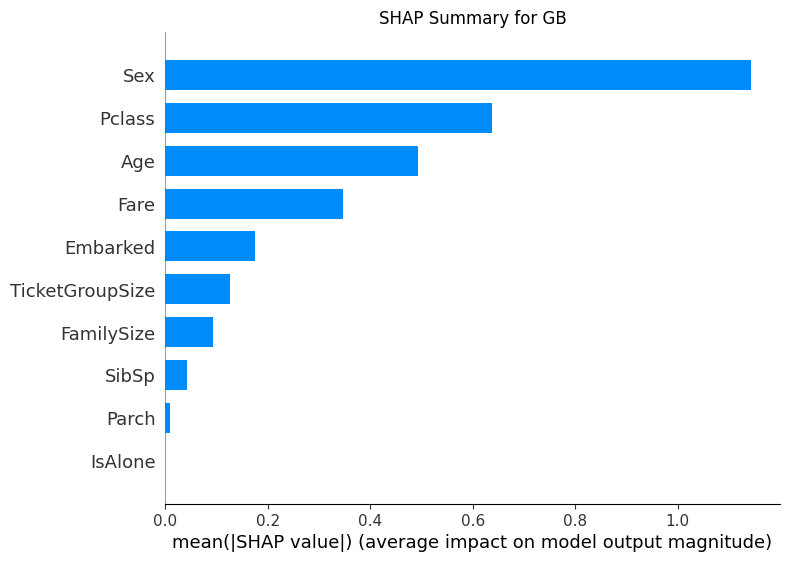

In [130]:
for name, model in models1.items():
    try:
        print(f"Running SHAP for {name} ...")

        # Use TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(x_test)

        # Plot summary (for classification, shap_values is a list)
        if isinstance(shap_values, list):
            shap.summary_plot(shap_values[1], x_test, plot_type="bar", show=False)
        else:
            shap.summary_plot(shap_values, x_test, plot_type="bar", show=False)

        plt.title(f"SHAP Summary for {name}")
        plt.show()

    except Exception as e:
        print(f"SHAP failed for {name}: {e}")


# **CONFUSION MATRIX**

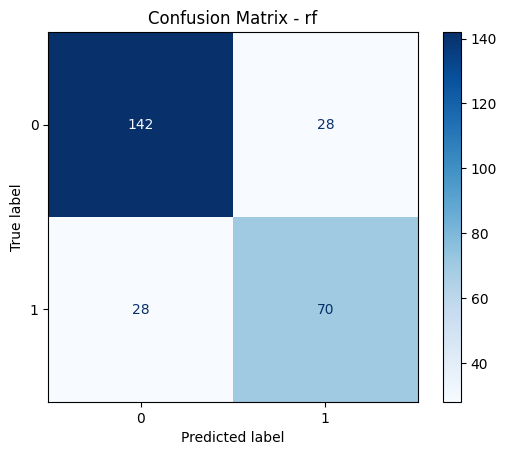

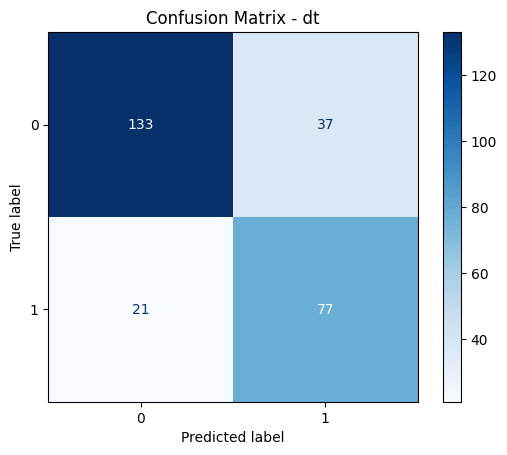

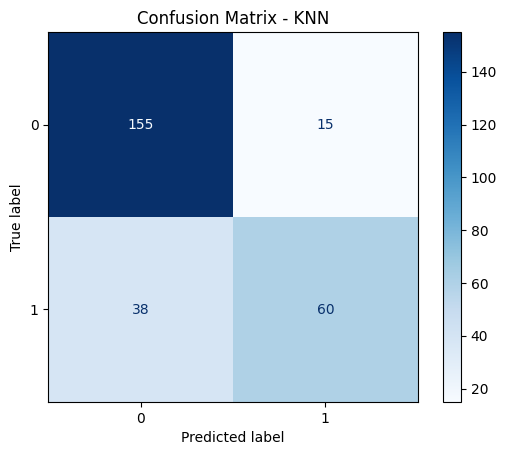

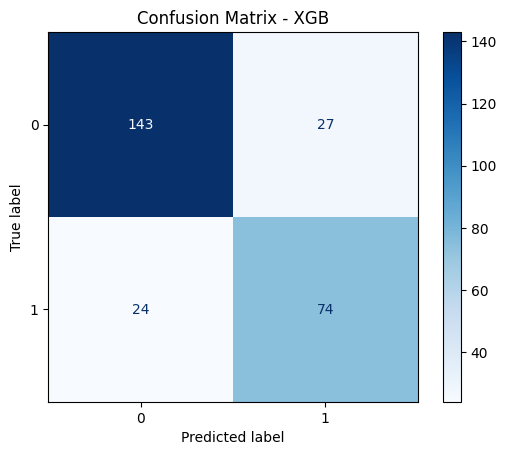

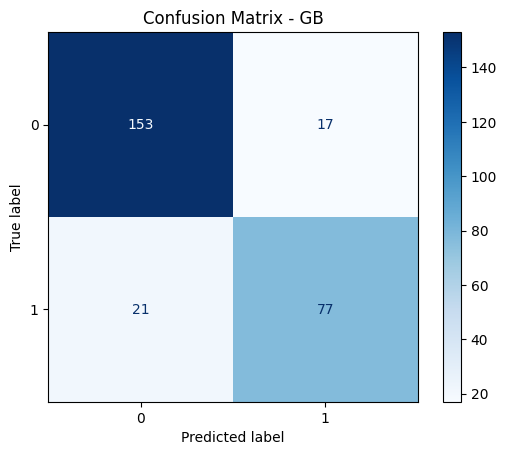

In [136]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


for name, model in models1.items():
    # Get predictions
    y_pred = model.predict(x_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# **SURVIVUAL CALCULATOR**

In [138]:
model.predict_proba(x_test)


array([[0.15741062, 0.84258938],
       [0.08609288, 0.91390712],
       [0.25976478, 0.74023522],
       [0.92949589, 0.07050411],
       [0.88758583, 0.11241417],
       [0.86502307, 0.13497693],
       [0.95189336, 0.04810664],
       [0.89076915, 0.10923085],
       [0.85025822, 0.14974178],
       [0.08222432, 0.91777568],
       [0.02353719, 0.97646281],
       [0.04977262, 0.95022738],
       [0.95956717, 0.04043283],
       [0.95722385, 0.04277615],
       [0.64607529, 0.35392471],
       [0.85025822, 0.14974178],
       [0.19928821, 0.80071179],
       [0.89293051, 0.10706949],
       [0.61915339, 0.38084661],
       [0.88340014, 0.11659986],
       [0.87140156, 0.12859844],
       [0.30478392, 0.69521608],
       [0.89924401, 0.10075599],
       [0.9590684 , 0.0409316 ],
       [0.51133201, 0.48866799],
       [0.86019889, 0.13980111],
       [0.06568114, 0.93431886],
       [0.95296177, 0.04703823],
       [0.04877742, 0.95122258],
       [0.9888909 , 0.0111091 ],
       [0.

In [143]:
import numpy as np

def survival_probability_calculator(model, passenger_data, feature_columns):
    """
    model: trained ML model (must support predict_proba)
    passenger_data: dict with passenger info (raw inputs)
    feature_columns: order of features used while training
    """

    passenger_data['FamilySize'] = passenger_data['SibSp'] + passenger_data['Parch'] + 1
    passenger_data['IsAlone'] = 1 if passenger_data['FamilySize'] == 1 else 0

    if 'TicketGroupSize' not in passenger_data:
        passenger_data['TicketGroupSize'] = 1


    input_data = np.array([passenger_data[feat] for feat in feature_columns]).reshape(1, -1)


    prob = model.predict_proba(input_data)[0]

    return {
        "Survival Probability": round(prob[1] * 100, 2),
        "Did Survive": "Yes" if prob[1] >= 0.5 else "No"
    }


feature_columns = ['Pclass','Sex','Age','Fare','Embarked',
                   'TicketGroupSize','IsAlone','SibSp','Parch','FamilySize']

passenger = {
    'Pclass': 3,
    'Sex': 1,        # 1 = male, 0 = female
    'Age': 22,
    'Fare': 7.25,
    'Embarked': 0,   # 0 = C, 1 = Q, 2 = S
    'SibSp': 1,
    'Parch': 0
}

result = survival_probability_calculator(logreg_model, passenger, feature_columns)
print(result)


{'Survival Probability': np.float64(13.4), 'Did Survive': 'No'}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
